# 安装 deap（遗传算法库）

In [49]:
!pip install deap matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


# 导入所需库

In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# 定义问题参数和矩阵

In [51]:
tasks = 10  # 任务数量
robots = 5  # 机器人数量

In [52]:
# 时间矩阵 (表示每个机器人完成每个任务的时间)
time_matrix = np.array([
    [8, 6, 7, 10, 5, 9, 8, 6, 7, 10],
    [7, 8, 6, 7, 9, 8, 6, 7, 8, 9],
    [6, 7, 8, 6, 7, 8, 9, 7, 6, 8],
    [9, 7, 6, 8, 9, 7, 8, 9, 7, 6],
    [8, 9, 7, 8, 6, 7, 8, 9, 8, 7]
])

In [53]:
# 资源消耗矩阵 (表示每个机器人完成每个任务的资源消耗)
resource_matrix = np.array([
    [12, 9, 10, 13, 7, 11, 10, 9, 11, 14],
    [10, 12, 9, 10, 12, 10, 9, 11, 12, 11],
    [9, 11, 12, 9, 11, 12, 13, 10, 9, 12],
    [13, 10, 9, 12, 13, 10, 11, 12, 10, 9],
    [11, 13, 11, 12, 10, 9, 12, 13, 11, 12]
])

In [54]:
# 安全系数矩阵 (表示每个机器人执行每个任务的安全性)
safety_matrix = np.array([
    [0.9, 0.7, 0.8, 0.9, 0.6, 0.8, 0.9, 0.7, 0.8, 0.9],
    [0.8, 0.9, 0.7, 0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.7],
    [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.8, 0.9, 0.7, 0.8],
    [0.9, 0.8, 0.7, 0.9, 0.9, 0.8, 0.8, 0.9, 0.7, 0.8],
    [0.8, 0.9, 0.8, 0.8, 0.7, 0.9, 0.9, 0.8, 0.8, 0.9]
])

# 定义适应度函数 

In [55]:
#最小化时间和资源消耗, 最大化安全性
def eval_individual(individual):
    total_time = np.max([time_matrix[individual[i], i] for i in range(tasks)])
    total_resources = np.sum([resource_matrix[individual[i], i] for i in range(tasks)])
    total_safety = np.sum([safety_matrix[individual[i], i] for i in range(tasks)])
    
    # 最小化时间和资源消耗，同时最大化安全性
    return total_time, total_resources, -total_safety

# 定义遗传算法的个体与种群

In [56]:
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0, 1.0))  # 最小化两个目标，最大化一个目标
creator.create("Individual", list, fitness=creator.FitnessMulti)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# 初始化工具箱

In [57]:
toolbox = base.Toolbox()

# 定义个体生成函数：随机分配任务到机器人
toolbox.register("indices", np.random.randint, 0, robots)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.indices, n=tasks)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册遗传算法的操作
# 交叉操作，这里使用两点交叉
toolbox.register("mate", tools.cxTwoPoint)
# 变异操作，随机改变个体基因的值，变异概率为 5%
toolbox.register("mutate", tools.mutUniformInt, low=0, up=robots-1, indpb=0.05)
# 选择操作，使用 NSGA-II 选择方法
toolbox.register("select", tools.selNSGA2)
# 评估个体适应度
toolbox.register("evaluate", eval_individual)

# 运行遗传算法

In [58]:
def run_ga():
    pop = toolbox.population(n=50)  # 种群大小为50
    hof = tools.ParetoFront()  # 保存最优解
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    
    logbook = tools.Logbook()  # 用于记录每一代的统计信息
    logbook.header = ["gen", "evals"] + stats.fields

    # 运行遗传算法
    pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.2, ngen=100, 
                                         stats=stats, halloffame=hof, verbose=True)
    
    # 记录每代的统计信息
    for rec in log:
        logbook.record(evals=len(pop), **rec)

    return pop, logbook, hof
pop, logbook, hof = run_ga()

gen	nevals	avg                      	std                               	min             	max                
0  	50    	[  9.28  109.5    -8.112]	[0.69397406 5.67186036 0.27469256]	[ 8.  98.  -8.7]	[ 10.  121.   -7.5]
1  	90    	[  8.84  104.1    -7.854]	[0.70313583 3.18904374 0.1734474 ]	[ 7.  98.  -8.3]	[ 10.  111.   -7.4]
2  	89    	[  8.46  100.82   -7.702]	[0.66962676 2.57441255 0.13036871]	[ 7. 95. -8.]   	[ 10.  108.   -7.4]
3  	94    	[ 8.44 98.1  -7.56]      	[0.82849261 1.99248588 0.12165525]	[ 7.  95.  -7.8]	[ 10.  103.   -7.3]
4  	91    	[ 8.18  95.74  -7.482]   	[0.84118963 1.57238672 0.13370116]	[ 7.  92.  -7.7]	[10.  99.  -7.2]   
5  	86    	[ 8.14  93.88  -7.372]   	[0.89465077 1.12498889 0.13272528]	[ 7.  91.  -7.6]	[ 9.  96.  -7.2]   
6  	94    	[ 8.3  93.14 -7.25]      	[0.94339811 1.18338498 0.08062258]	[ 7.  91.  -7.5]	[ 9.  95.  -7.1]   
7  	91    	[ 7.66 91.86 -7.26]      	[0.90796476 0.82486363 0.09165151]	[ 7.  91.  -7.4]	[ 9.  93.  -7.1]   
8  	93    	[ 8.    

98 	85    	[ 8.8   90.74  -7.016]   	[0.6        0.79523581 0.05043808]	[ 7.  88.  -7.2]	[ 9. 91. -7.]      
99 	92    	[ 8.88 90.84 -7.01]      	[0.47497368 0.64373908 0.04123106]	[ 7.  88.  -7.2]	[ 9. 91. -7.]      
100	89    	[ 8.88  90.86  -7.008]   	[0.47497368 0.56603887 0.0337046 ]	[ 7.  88.  -7.2]	[ 9. 91. -7.]      


# 结果可视化

In [59]:
gen = logbook.select("gen")
avg_time, avg_resources, avg_safety = np.array(logbook.select("avg")).T
min_time, min_resources, min_safety = np.array(logbook.select("min")).T

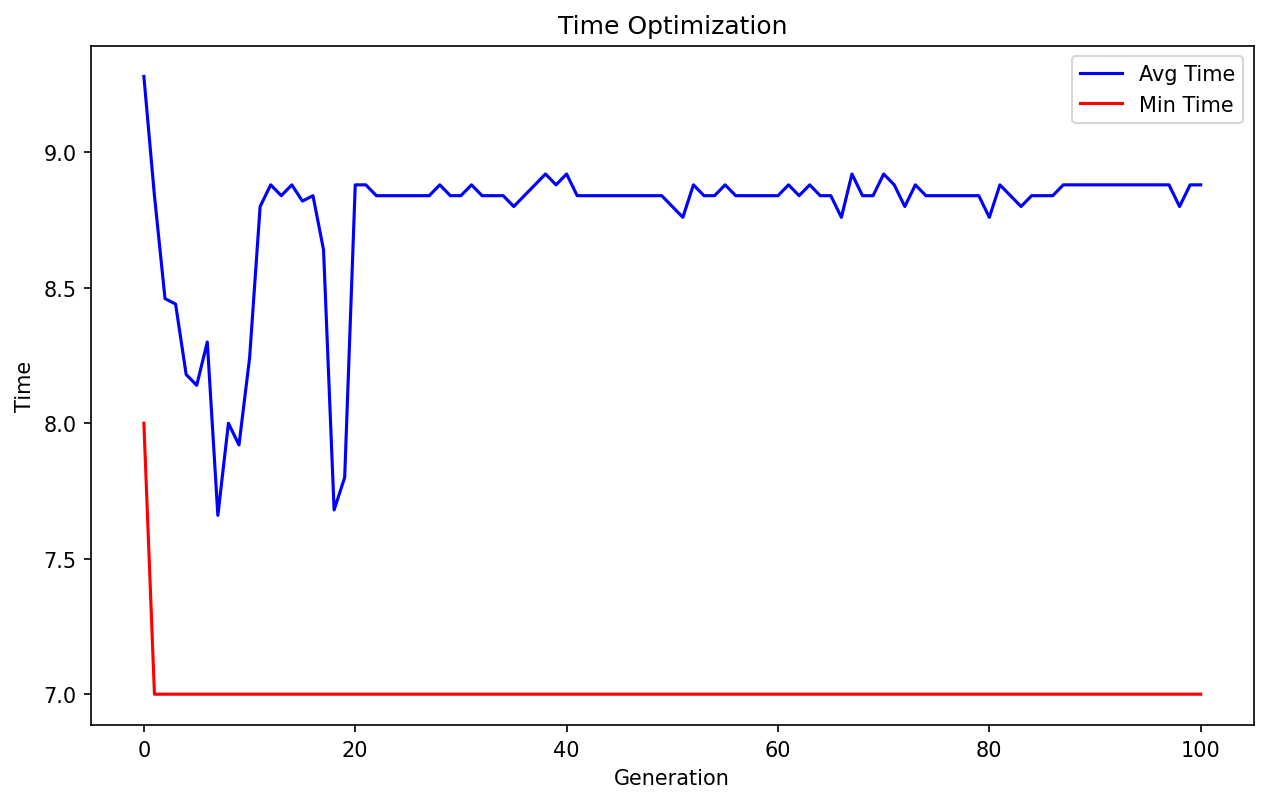

In [60]:
# 绘制时间优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, avg_time, label="Avg Time", color='blue')
plt.plot(gen, min_time, label="Min Time", color='red')
plt.xlabel("Generation")
plt.ylabel("Time")
plt.title("Time Optimization")
plt.legend()
plt.savefig('time_optimization.png')

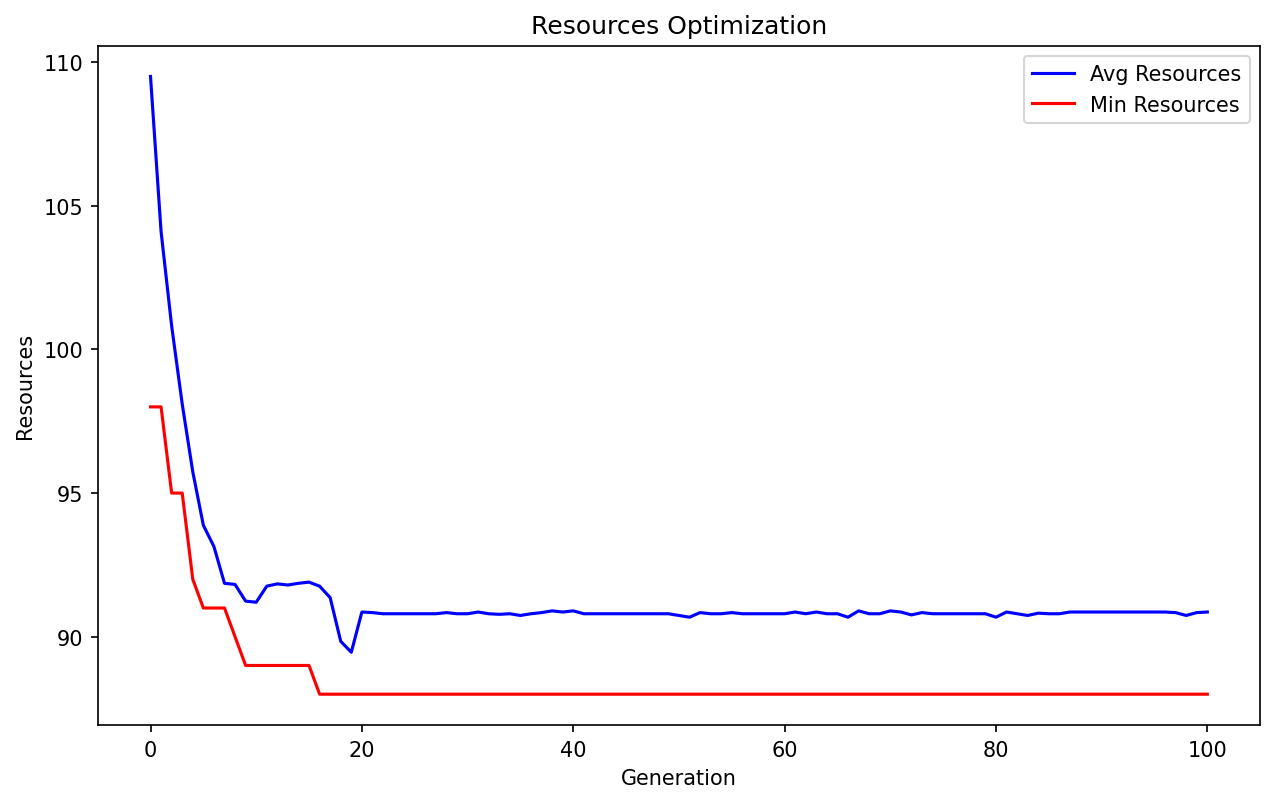

In [61]:
#绘制资源优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, avg_resources, label="Avg Resources", color='blue')
plt.plot(gen, min_resources, label="Min Resources", color='red')
plt.xlabel("Generation")
plt.ylabel("Resources")
plt.title("Resources Optimization")
plt.legend()
plt.savefig('resources_optimization.png')

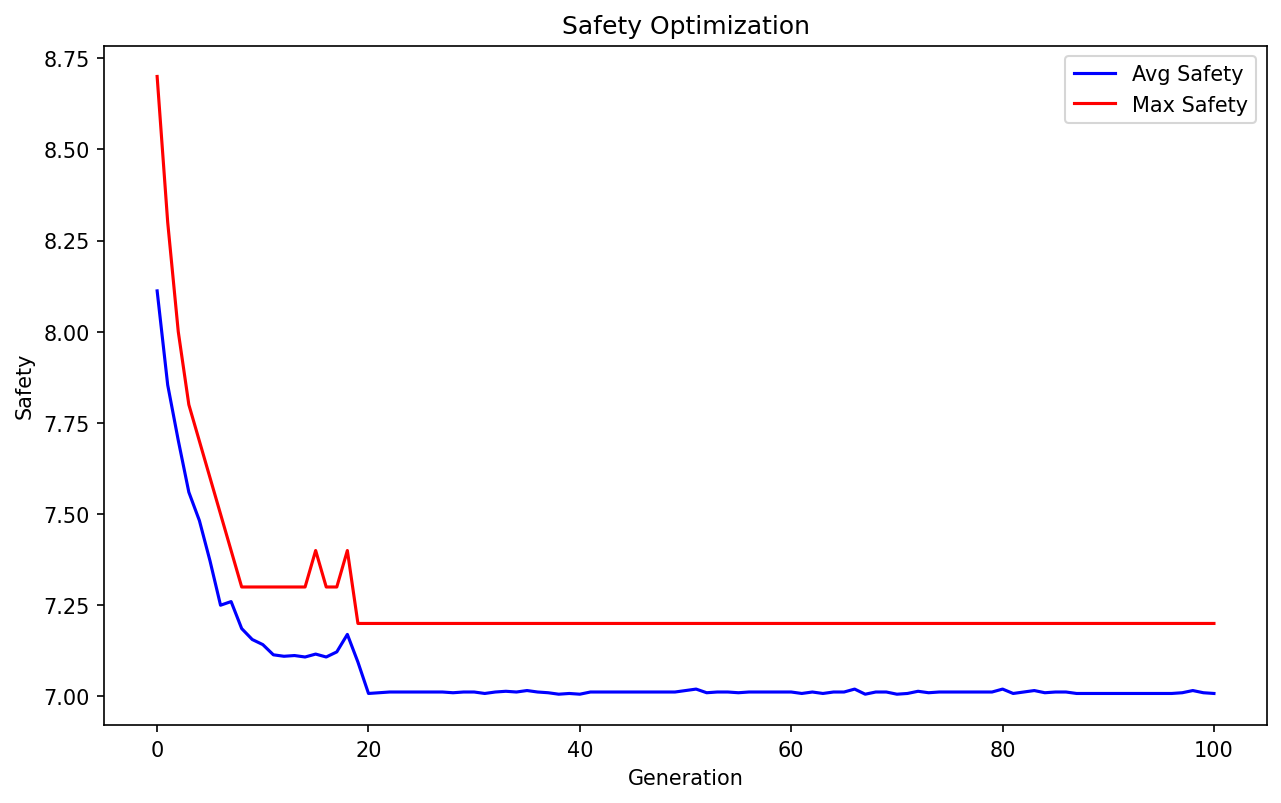

In [62]:
#绘制安全优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, -avg_safety, label="Avg Safety", color='blue')  # 这里是负的，因为我们最大化安全性
plt.plot(gen, -min_safety, label="Max Safety", color='red')
plt.xlabel("Generation")
plt.ylabel("Safety")
plt.title("Safety Optimization")
plt.legend()
plt.savefig('safety_optimization.png')

# 输出最优解

In [63]:
print("Hall of Fame (Best Solutions):")
for ind in hof:
    print(ind, ind.fitness.values)

Hall of Fame (Best Solutions):
[2, 0, 3, 2, 0, 4, 1, 0, 2, 3] (7.0, 88.0, -7.199999999999999)
[2, 0, 1, 2, 0, 4, 1, 0, 2, 3] (7.0, 88.0, -7.199999999999999)
[2, 0, 3, 2, 0, 3, 1, 0, 2, 3] (7.0, 89.0, -7.1)
[2, 0, 1, 2, 0, 3, 1, 0, 2, 3] (7.0, 89.0, -7.1)
[2, 0, 3, 2, 0, 1, 1, 0, 2, 1] (9.0, 91.0, -7.0)
[2, 0, 1, 2, 0, 1, 1, 0, 2, 1] (9.0, 91.0, -7.0)
[2, 0, 3, 2, 0, 3, 1, 0, 2, 1] (9.0, 91.0, -7.0)
[2, 0, 1, 2, 0, 3, 1, 0, 2, 1] (9.0, 91.0, -7.0)
